# Test des fonctions d'accès aux données optiques.

_Version 1.0 [31/01/2023] Jérôme Lacaille_

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (9,6) # Pour l'affichage d'images un peu plus grandes.

In [53]:
# Ce bout de code est pratique car il permet de recharger automatiquement un package quand vous le développez.
%reload_ext autoreload
%autoreload 2

## 1. Gestion des zones géographiques.

Nous allons d'abord créer des fichiers de zones géographiques correspondant à des "rectangles" en latitude et longitudes.
Ce que l'on souhaite c'est pouvoir manipuler des dictionnaires avec deux composantes : un nom et les coordonnées du rectangle :

    {
        'name' : "Le nom de la zone",
        'bbox' : [lat_min, lon_min, lat_max, lon_max]
    }

Ensuite on va récupérer automatiquement ces rectangles depuis un site spécialisé et créer un nouvel objet Python capable de gérer ces listes.

### 1.1 Etude d'une zone géographique.
En utilisant le site [geozone.io](https://geojson.io/) on peut créer facilement des GEOFILES qui contiennet des informations sur la latitude et la longitude de zones rectangulaires.

Un bouton vous permet de copier facilement un descriptif json (geojson en fait) et le copier directement dans une cellule comme un dictionnaire.

In [2]:
geofile = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {'name' : 'Chypre'},
      "geometry": {
        "coordinates": [
          [
            [
              23.554712962096346,
              35.607613541778534
            ],
            [
              23.554712962096346,
              34.89248636947745
            ],
            [
              26.302614086102693,
              34.89248636947745
            ],
            [
              26.302614086102693,
              35.607613541778534
            ],
            [
              23.554712962096346,
              35.607613541778534
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

Pour mieux gérer vos zones géographiques (geozones) je vous propose de rajouter un champ 'name' aux propriétés. Vous verrez que cela nous facilitera le travail par la suite.

          "properties": {'name' : 'Chypre'},

In [5]:
# On va avoir besoin de numpy pour gérer les coordinnées.
import numpy as np

On va maintenant récupérer le nom et les coordonnées.

In [6]:
name = geofile['features'][0]['properties']['name']
name

'Chypre'

In [7]:
G = np.array(geofile['features'][0]['geometry']['coordinates'][0])
G

array([[23.55471296, 35.60761354],
       [23.55471296, 34.89248637],
       [26.30261409, 34.89248637],
       [26.30261409, 35.60761354],
       [23.55471296, 35.60761354]])

On va maintenant chercher les coins de notre rectangle. Attention à ne pas intervertir longitude et latitude. Pour cela je vous propose de regarder un rectangle que vous caisssez bien, avec l'Ile de France par exemple, on ne peut pas se tromper.

In [8]:
lon0, lat0 = G.min(axis=0)
lat0, lon0

(34.89248636947745, 23.554712962096346)

In [9]:
lon1, lat1 = G.max(axis=0)
lat1, lon1

(35.607613541778534, 26.302614086102693)

Finalement vous pouvez créer votre zone comme un dictionnaire.

In [10]:
zone = dict(name=geofile['features'][0]['properties']['name'], bbox=[lat0, lon0, lat1, lon1])
zone

{'name': 'Chypre',
 'bbox': [34.89248636947745,
  23.554712962096346,
  35.607613541778534,
  26.302614086102693]}

### 1.3 Création d'un package Python.

Le code que nous venons de créer peut s'automatiser. je vous propose de créer un nouveau package "satellite" sur votre machine. Pour vous aider j'ai construit le package "satellite_max2" sous GitHub, donc dans un premier temps je vous propose de copier le contenu de ce package sur votre machine et de le renommer "satellite".

1. La première étape consiste à récupérer les données. 

### 1.2 Gestion d'une liste de zones géographiques.

Maintenant nous allons profiter d'une fonction sympatique de [geozone.io](https://geojson.io/) qui nous permet de sélectionner en une seule fois plusieurs zones. Une fois que c'est fait enregistrez le fichier. Par défaut, il s'appelle "map.geojson".

In [55]:
Z = sat.zonelist()
Z

[{'name': 'Ile de France',
  'bbox': [48.7535883521073,
   2.0085203859495095,
   48.99193420772434,
   2.6788390690815334]},
 {'name': 'Barcelone',
  'bbox': [41.22007856049126,
   1.6649881237897546,
   41.63394152808198,
   2.4690345841926273]},
 {'name': 'Chypre',
  'bbox': [34.85709260445668,
   23.397028867484522,
   35.631415093017225,
   26.44578481885614]}]

In [10]:
geomapfile = os.path.join(sat.EARTHDIR,'map.geojson')
geomapfile

'/Users/holie/wrk0/satellite/data/zones/_Earth/map.geojson'

In [24]:
gdf = pd.read_json(geomapfile)
gdf

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Il..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Ba..."
2,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Ch..."


In [15]:
gdf.features[0]

{'type': 'Feature',
 'properties': {'name': 'Ile de France'},
 'geometry': {'coordinates': [[[2.008520385949509, 48.99193420772434],
    [2.008520385949509, 48.7535883521073],
    [2.678839069081533, 48.7535883521073],
    [2.678839069081533, 48.99193420772434],
    [2.008520385949509, 48.99193420772434]]],
  'type': 'Polygon'}}

## 1. Manipulation des zones géographiques.

In [4]:
geofile = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {'name' : 'Chypre'},
      "geometry": {
        "coordinates": [
          [
            [
              23.554712962096346,
              35.607613541778534
            ],
            [
              23.554712962096346,
              34.89248636947745
            ],
            [
              26.302614086102693,
              34.89248636947745
            ],
            [
              26.302614086102693,
              35.607613541778534
            ],
            [
              23.554712962096346,
              35.607613541778534
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

In [5]:
zone = sat.getzone(geofile)
zone

{'name': 'Chypre',
 'bbox': [34.89248636947745,
  23.554712962096346,
  35.607613541778534,
  26.302614086102693]}

# 2. Récupération du contenu d'une image FCOVER.

In [6]:
df = sat.ocli.get_ncfiles()
df

,FILE,REVISION
DATE,,
2021-02-20,../data/zones/_Global-Earth/FCOVER/FCOVER300_R...,6
2021-06-20,../data/zones/_Global-Earth/FCOVER/FCOVER300_R...,6


In [7]:
fname = df.FILE[0]
fname

'../data/zones/_Global-Earth/FCOVER/FCOVER300_RT6_202102200000_GLOBE_OLCI_V1.1.1/c_gls_FCOVER300-RT6_202102200000_GLOBE_OLCI_V1.1.1.nc'

In [8]:
F,E = sat.ocli.get_ncvalues(zone,fname,'FCOVER')

Text(0.5, 1.0, 'Chypre [FCOVER] last:20/02/2021')

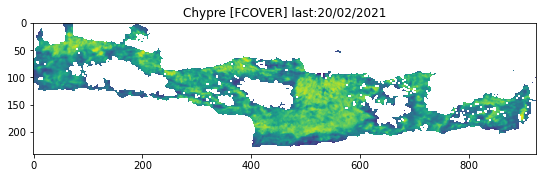

In [9]:
# Affichage de l'image.
plt.imshow(F)
plt.title(zone['name'] + " [FCOVER] last:" + df.index[0].strftime('%d/%m/%Y'))

In [10]:
F

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [11]:
E

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])